In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg as la
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


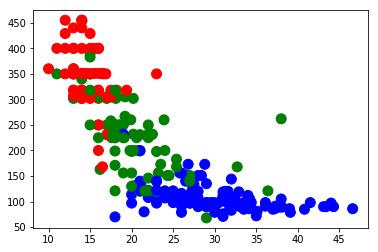

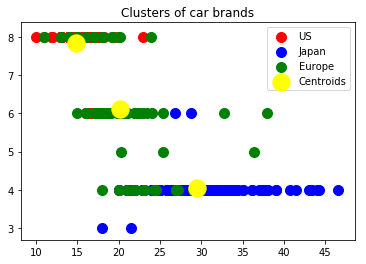

In [2]:

dataset = pd.read_csv('D:/Softwares/Downloads/Datasets/cars.csv')

X = dataset.iloc[:,:-1].values

X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']

for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))

kmeans = KMeans(n_clusters=3) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'b', 2: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in y_kmeans]

LABEL_COUNTRY_MAP = {0:'US', 1: 'Japan', 2: 'Europe'}
label_country = [LABEL_COUNTRY_MAP[l] for l in y_kmeans]



plt.scatter(X[:,0],X[:,2], c= label_color, s=100, label=label_country) 

plt.show()

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

In [3]:

X_std = StandardScaler().fit_transform(X)


In [4]:
pca = PCA(n_components=7)
x_7d = pca.fit_transform(X_std)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.08548138 0.89066754 0.64126285 0.19491505 0.12415171 0.05610065
 0.03434389]
[0.72371382 0.12675072 0.09125799 0.02773832 0.01766801 0.00798367
 0.00488747]


1.0


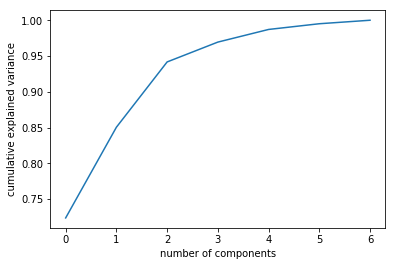

In [5]:
print(pca.explained_variance_ratio_.sum())
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [6]:
pca4 = PCA(n_components=4)
x_4d = pca4.fit_transform(X_std)
print(pca4.explained_variance_)
print(pca4.explained_variance_ratio_)

[5.08548138 0.89066754 0.64126285 0.19491505]
[0.72371382 0.12675072 0.09125799 0.02773832]


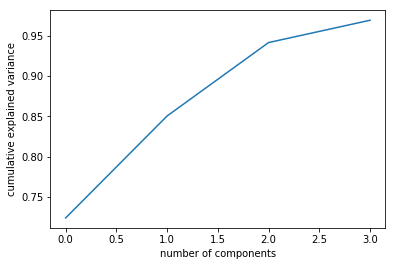

In [7]:
plt.plot(np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [8]:
pca3 = PCA(n_components=3)
x_3d = pca3.fit_transform(X_std)
print(pca3.explained_variance_)
print(pca3.explained_variance_ratio_)


[5.08548138 0.89066754 0.64126285]
[0.72371382 0.12675072 0.09125799]


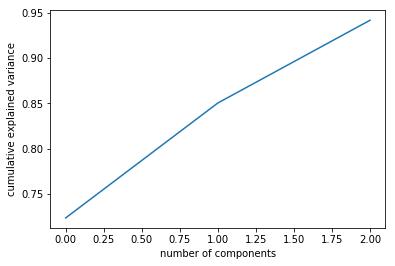

In [9]:
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

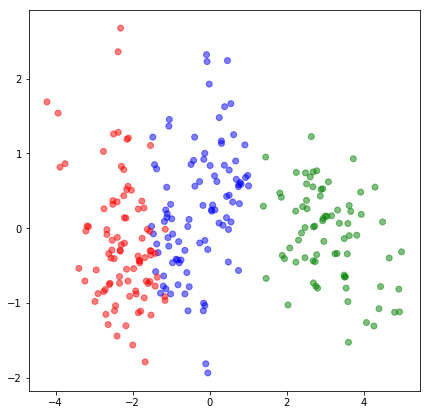

In [10]:
kmeans = KMeans(n_clusters = 3)

X_clustered = kmeans.fit_predict(x_7d)

LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color, alpha=0.5) 
plt.show()





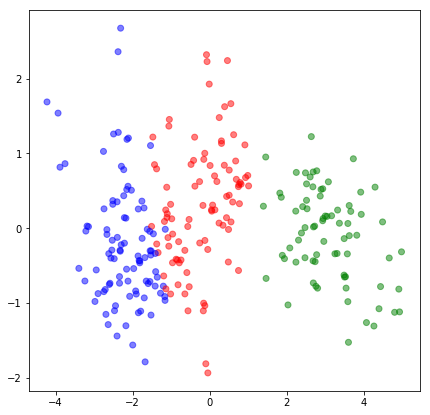

In [11]:
kmeans = KMeans(n_clusters = 3)

X_clustered = kmeans.fit_predict(x_4d)

LABEL_COLOR_MAP = {0:'r', 1: 'b', 2: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()

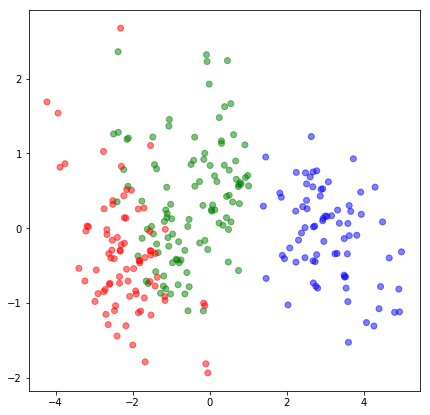

In [12]:
kmeans = KMeans(n_clusters = 3)

X_clustered = kmeans.fit_predict(x_3d)

LABEL_COLOR_MAP = {0:'r', 1: 'b', 2: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

plt.figure(figsize = (7,7))
plt.scatter(x_3d[:,0],x_3d[:,2], c= label_color, alpha=0.5) 
plt.show()